# Analysis of outlier proteins/metabolites found among samples with high HbA1C in the Arivale dataset

Note: the main idea here is to test various graph analysis methods, not to build a rigorous characterization of Arivale outliers.

In [1]:
# imports
import numpy as np
import pandas as pd
import networkx as nx
import kgfe

## 1. Load data

In [2]:
prots_data = pd.read_csv('../data/prots_lassocv_hba1c_top_weights.csv', index_col=0)

In [3]:
prots_data

,weight,gene_name,uniprot
CVD2_P09341,0.004217,CXCL1,P09341
INF_Q5T4W7,0.004247,ARTN,Q5T4W7
INF_Q13007,0.004683,IL24,Q13007
CVD3_Q9H2A7,0.005046,CXCL16,Q9H2A7
CVD2_P51161,0.005645,FABP6,P51161
CVD3_P80370,0.006000,DLK1,P80370
CVD3_Q99969,0.006440,RARRES2,Q99969
CVD2_P04792,0.007224,HSPB1,P04792
INF_P39905,0.007638,GDNF,P39905
CVD2_Q9BQ51,0.008087,PDCD1LG2,Q9BQ51


In [4]:
mets_data = pd.read_csv('../data/mets_lassocv_hba1c_top_weights.csv', index_col=0)

In [5]:
prots_data.sort_values('weight', ascending=False).head(10)

,weight,gene_name,uniprot
CVD2_Q9Y6K9,0.036213,IKBKG,Q9Y6K9
CVD2_O00220,0.016185,TNFRSF10A,O00220
CVD3_P05107,0.013646,ITGB2,P05107
CVD3_P28799,0.013446,GRN,P28799
CVD2_Q12866,0.012231,MERTK,Q12866
CVD2_Q96D42,0.009330,HAVCR1,Q96D42
INF_P13236,0.008342,CCL4,P13236
CVD2_Q9BQ51,0.008087,PDCD1LG2,Q9BQ51
INF_P39905,0.007638,GDNF,P39905
CVD2_P04792,0.007224,HSPB1,P04792


In [6]:
mets_data.sort_values('weight', ascending=False)

,weight,name,KEGG,PUBCHEM,CHEMBL
100000808,0.034156,cysteine s-sulfate,C05824,115015.0,CHEMBL457665
100000626,0.024000,sphingosine 1-phosphate,C06124,5283560.0,CHEMBL225155
279,0.019783,cystine,C00491,67678.0,CHEMBL590540
803,0.016133,mannose,C00159,18950.0,CHEMBL469448
100000773,0.010998,3-hydroxyoctanoate,NaN,26613.0,NaN
572,0.010297,glucose,C00031,5793.0,CHEMBL1222250
100005985,0.010199,"sphingomyelin (d18:2/14:0, d18:1/14:1)*",NaN,NaN,NaN
100000841,0.009487,oxalate (ethanedioate),C00209,971.0,CHEMBL146755
444,0.009190,ornithine,C00077,6262.0,CHEMBL446143
2051,0.009039,methylsuccinate,NaN,10349.0,NaN


In [7]:
top_prots = prots_data[prots_data.weight > 0]
top_mets = mets_data[mets_data.weight > 0]
low_prots = prots_data[prots_data.weight < 0]
low_mets = mets_data[mets_data.weight < 0]

## 2. Load SPOKE

In [8]:
import igraph as ig

In [9]:
spoke_graph = kgfe.spoke_loader.load_spoke_igraph('../../graph_utils/spoke_2021.jsonl.gz', directed=True,
                                                    verbose=False)

In [10]:
spoke_graph_ud = spoke_graph.copy()
spoke_graph_ud.to_undirected(combine_edges='first')
spoke_graph_ud.simplify(combine_edges='first')

In [11]:
# TODO: identify the largest connected component
ccs = spoke_graph_ud.connected_components()

In [12]:
names_to_ids = kgfe.graph_info.get_names_to_ids(spoke_graph_ud)

### Load smaller versions of spoke

### Map proteins and metabolites to SPOKE nodes

In [13]:
len(names_to_ids)

617546

In [14]:
uniprot_to_ids = kgfe.graph_info.spoke_identifiers_to_ids(spoke_graph_ud, 'Protein')

In [15]:
chembl_to_ids = kgfe.graph_info.spoke_identifiers_to_ids(spoke_graph_ud, 'Compound')

In [16]:
high_prots = top_prots['uniprot']
low_prots = low_prots['uniprot']

high_chems = top_mets[(~top_mets['CHEMBL'].isna())]['CHEMBL']


In [17]:
high_chems_kegg = top_mets[(~top_mets['KEGG'].isna())]['KEGG']


In [18]:
high_prots_spoke_ids = [uniprot_to_ids[x] for x in high_prots]
low_prots_spoke_ids = [uniprot_to_ids[x] for x in low_prots]

In [19]:
high_prots_spoke_ids

['2118151',
 '2133161',
 '2123169',
 '2152386',
 '2120570',
 '2121576',
 '2150560',
 '2117852',
 '2120010',
 '2150770',
 '2118729',
 '2148547',
 '2123100',
 '2119566',
 '2117878',
 '2114764',
 '2158393']

In [20]:
high_chems_spoke_ids = [(x, chembl_to_ids[x]) for x in high_chems if  x in chembl_to_ids]

In [21]:
high_chems_spoke_ids

[('CHEMBL146755', '802643'),
 ('CHEMBL1222250', '294279'),
 ('CHEMBL469448', '622101'),
 ('CHEMBL225155', '1338787'),
 ('CHEMBL457665', '26652')]

Note: many chems were not able to be mapped onto SPOKE.

In [22]:
high_chems_kegg_spoke_ids = [(x, chembl_to_ids[x]) for x in top_mets['KEGG'] if  x in chembl_to_ids]

In [23]:
len([x for x in chembl_to_ids.keys() if x.startswith('C0')])

2387

In [24]:
high_chems_kegg_spoke_ids

[]

## Compare the identified nodes against a null model.

- All SPOKE proteins
- All Arivale proteins
- SPOKE proteins with degree matching to high proteins

In [25]:
prots_data_full = pd.read_csv('../data/prots_hba1c_outliers_2023_07_21.csv', index_col=0)
all_prots_spoke_ids = [uniprot_to_ids[x] for x in prots_data_full['uniprot'] if x in uniprot_to_ids]

In [26]:
spoke_graph_ud_connected = spoke_graph_ud.subcomponent(high_prots_spoke_ids[0])
spoke_graph_ud_connected = spoke_graph_ud.induced_subgraph(spoke_graph_ud_connected)

### Null model for high proteins

In [27]:
len(high_prots_spoke_ids)

17

In [28]:
%time high_prots_stats = kgfe.explanations.graph_node_stats(spoke_graph_ud_connected, list(set(high_prots_spoke_ids)))

CPU times: user 752 ms, sys: 192 µs, total: 752 ms
Wall time: 764 ms


In [29]:
%time high_prots_null_results = kgfe.explanations.null_graph_stats(spoke_graph_ud_connected, 'Protein', len(high_prots_spoke_ids))

CPU times: user 4min 46s, sys: 481 ms, total: 4min 46s
Wall time: 4min 47s


In [30]:
%time high_prots_null_results_arivale_prots = kgfe.explanations.null_graph_stats(spoke_graph_ud_connected, 'Protein', len(high_prots_spoke_ids),\
                                                                   ids_subset=all_prots_spoke_ids)

CPU times: user 51.8 s, sys: 4.83 ms, total: 51.8 s
Wall time: 51.9 s


In [31]:
high_prots_null_results = pd.DataFrame(high_prots_null_results)


In [32]:
high_prots_null_results.mean()

average_pairwise_distance     5.086176
degree_mean                  19.664118
degree_std                   59.339262
clustering                         NaN
dtype: float64

In [33]:
import matplotlib.pyplot as plt

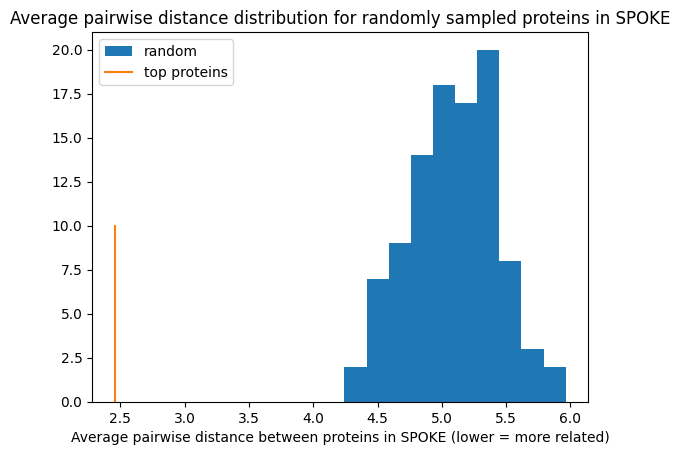

In [34]:
plt.hist(high_prots_null_results.average_pairwise_distance, bins=10, label='random')
plt.title('Average pairwise distance distribution for randomly sampled proteins in SPOKE')
plt.plot([high_prots_stats['average_pairwise_distance'], high_prots_stats['average_pairwise_distance']], [0, 10], label='top proteins')
plt.xlabel('Average pairwise distance between proteins in SPOKE (lower = more related)')
plt.legend()

In [35]:
high_prots_null_results_arivale_prots = pd.DataFrame(high_prots_null_results_arivale_prots)


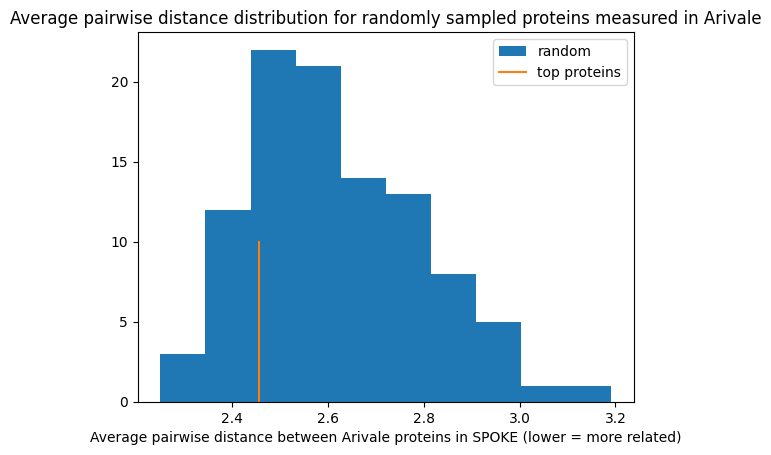

In [36]:
plt.hist(high_prots_null_results_arivale_prots.average_pairwise_distance, bins=10, label='random')
plt.title('Average pairwise distance distribution for randomly sampled proteins measured in Arivale')
plt.plot([high_prots_stats['average_pairwise_distance'], high_prots_stats['average_pairwise_distance']], [0, 10], label='top proteins')
plt.xlabel('Average pairwise distance between Arivale proteins in SPOKE (lower = more related)')
plt.legend()

In [43]:
%time high_prots_null_results_degree_dist_prots = kgfe.explanations.null_graph_stats(spoke_graph_ud_connected, 'Protein',\
                                                                                len(high_prots_spoke_ids),\
                                                                                use_degree_sampling=True,\
                                                                                input_id_set=high_prots_spoke_ids)

CPU times: user 5min 14s, sys: 1.82 s, total: 5min 16s
Wall time: 5min 16s


In [46]:
high_prots_null_results_degree_dist_prots = pd.DataFrame(high_prots_null_results_degree_dist_prots)

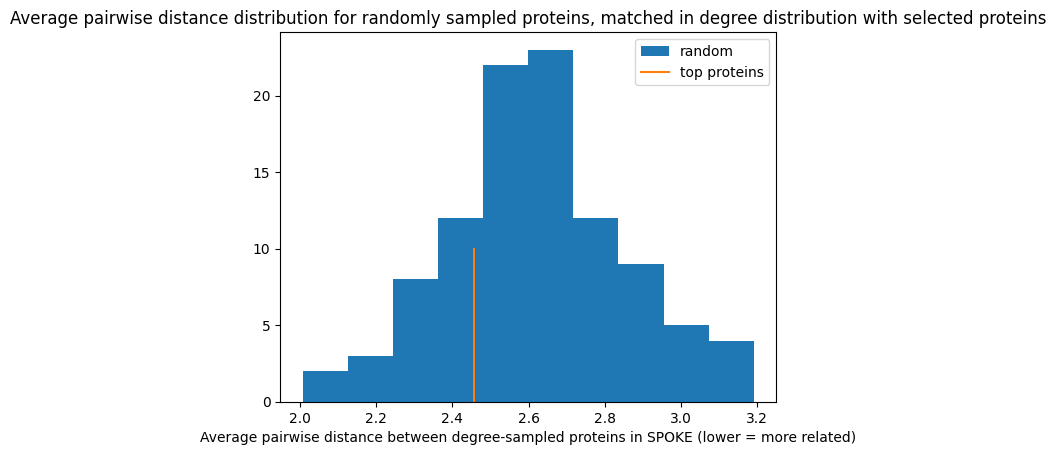

In [47]:
plt.hist(high_prots_null_results_degree_dist_prots.average_pairwise_distance, bins=10, label='random')
plt.title('Average pairwise distance distribution for randomly sampled proteins, matched in degree distribution with selected proteins')
plt.plot([high_prots_stats['average_pairwise_distance'], high_prots_stats['average_pairwise_distance']], [0, 10], label='top proteins')
plt.xlabel('Average pairwise distance between degree-sampled proteins in SPOKE (lower = more related)')
plt.legend()

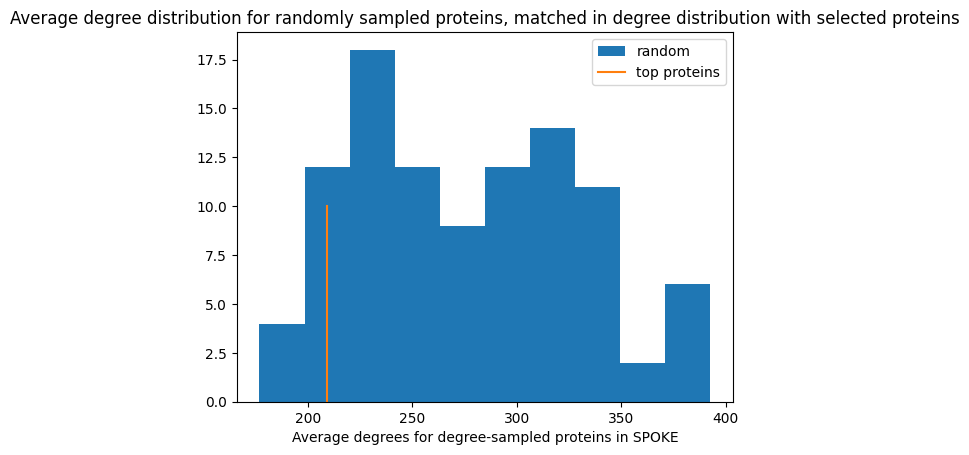

In [48]:
plt.hist(high_prots_null_results_degree_dist_prots.degree_mean, bins=10, label='random')
plt.title('Average degree distribution for randomly sampled proteins, matched in degree distribution with selected proteins')
plt.plot([high_prots_stats['degree_mean'], high_prots_stats['degree_mean']], [0, 10], label='top proteins')
plt.xlabel('Average degrees for degree-sampled proteins in SPOKE')
plt.legend()

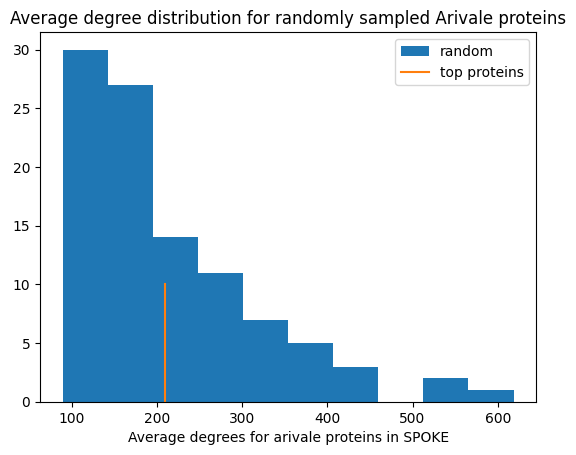

In [44]:
plt.hist(high_prots_null_results_arivale_prots.degree_mean, bins=10, label='random')
plt.title('Average degree distribution for randomly sampled Arivale proteins')
plt.plot([high_prots_stats['degree_mean'], high_prots_stats['degree_mean']], [0, 10], label='top proteins')
plt.xlabel('Average degrees for arivale proteins in SPOKE')
plt.legend()

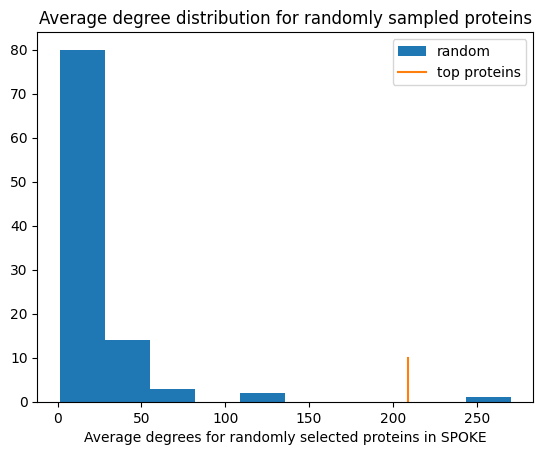

In [45]:
plt.hist(high_prots_null_results.degree_mean, bins=10, label='random')
plt.title('Average degree distribution for randomly sampled proteins')
plt.plot([high_prots_stats['degree_mean'], high_prots_stats['degree_mean']], [0, 10], label='top proteins')
plt.xlabel('Average degrees for randomly selected proteins in SPOKE')
plt.legend()

### Null model for low proteins (negative coefficients)

In [49]:
len(low_prots_spoke_ids)

17

In [50]:
%time low_prots_stats = kgfe.explanations.graph_node_stats(spoke_graph_ud_connected, list(set(low_prots_spoke_ids)))

CPU times: user 745 ms, sys: 7 µs, total: 745 ms
Wall time: 746 ms


In [51]:
%time low_prots_null_results = kgfe.explanations.null_graph_stats(spoke_graph_ud_connected, 'Protein', len(low_prots_spoke_ids))

CPU times: user 4min 42s, sys: 1.28 s, total: 4min 44s
Wall time: 4min 45s


In [52]:
%time low_prots_null_results_arivale_prots = kgfe.explanations.null_graph_stats(spoke_graph_ud_connected, 'Protein', len(low_prots_spoke_ids),\
                                                                   ids_subset=all_prots_spoke_ids)

CPU times: user 47.3 s, sys: 7.84 ms, total: 47.3 s
Wall time: 47.4 s


In [53]:
low_prots_null_results = pd.DataFrame(low_prots_null_results)


In [54]:
low_prots_null_results.mean()

average_pairwise_distance     5.112794
degree_mean                  14.953529
degree_std                   43.704344
clustering                         NaN
dtype: float64

In [55]:
import matplotlib.pyplot as plt

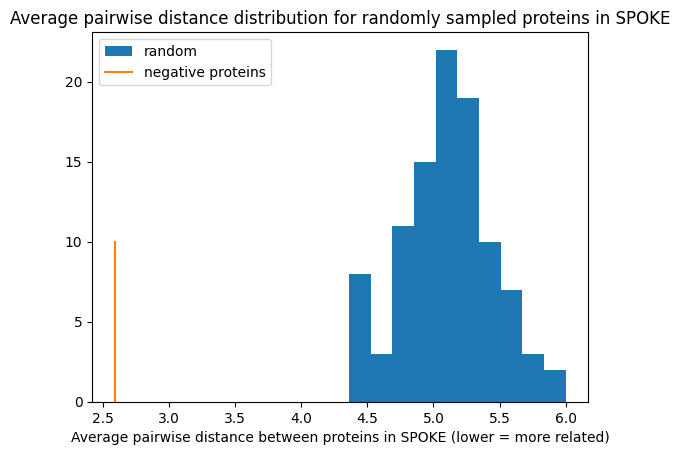

In [56]:
plt.hist(low_prots_null_results.average_pairwise_distance, bins=10, label='random')
plt.title('Average pairwise distance distribution for randomly sampled proteins in SPOKE')
plt.plot([low_prots_stats['average_pairwise_distance'], low_prots_stats['average_pairwise_distance']], [0, 10], label='negative proteins')
plt.xlabel('Average pairwise distance between proteins in SPOKE (lower = more related)')
plt.legend()

In [57]:
low_prots_null_results_arivale_prots = pd.DataFrame(low_prots_null_results_arivale_prots)


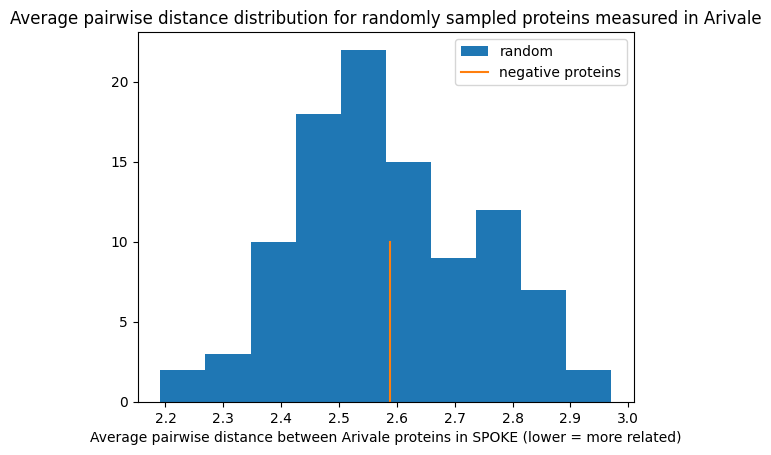

In [58]:
plt.hist(low_prots_null_results_arivale_prots.average_pairwise_distance, bins=10, label='random')
plt.title('Average pairwise distance distribution for randomly sampled proteins measured in Arivale')
plt.plot([low_prots_stats['average_pairwise_distance'], low_prots_stats['average_pairwise_distance']], [0, 10], label='negative proteins')
plt.xlabel('Average pairwise distance between Arivale proteins in SPOKE (lower = more related)')
plt.legend()

In [59]:
%time low_prots_null_results_degree_dist_prots = kgfe.explanations.null_graph_stats(spoke_graph_ud_connected, 'Protein',\
                                                                                len(low_prots_spoke_ids),\
                                                                                use_degree_sampling=True,\
                                                                                input_id_set=low_prots_spoke_ids)

CPU times: user 5min 8s, sys: 792 ms, total: 5min 9s
Wall time: 5min 8s


In [60]:
low_prots_null_results_degree_dist_prots = pd.DataFrame(low_prots_null_results_degree_dist_prots)

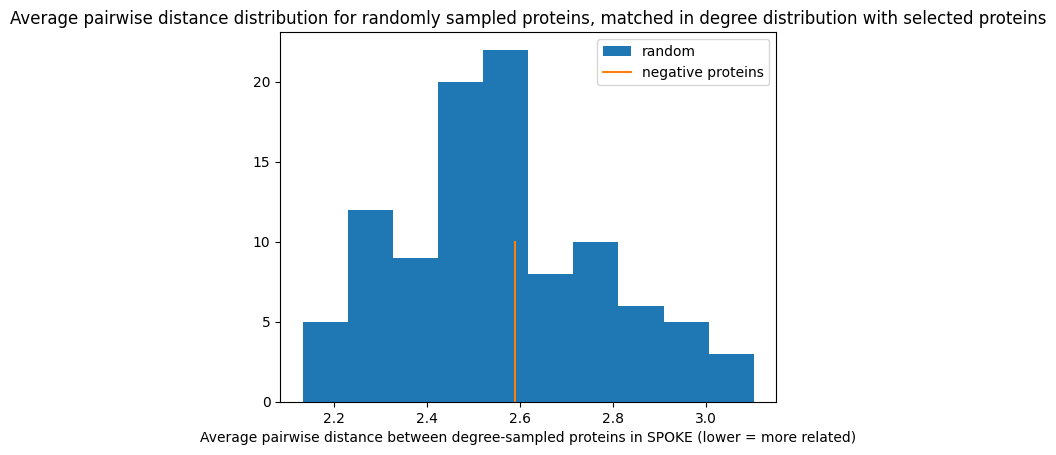

In [61]:
plt.hist(low_prots_null_results_degree_dist_prots.average_pairwise_distance, bins=10, label='random')
plt.title('Average pairwise distance distribution for randomly sampled proteins, matched in degree distribution with selected proteins')
plt.plot([low_prots_stats['average_pairwise_distance'], low_prots_stats['average_pairwise_distance']], [0, 10], label='negative proteins')
plt.xlabel('Average pairwise distance between degree-sampled proteins in SPOKE (lower = more related)')
plt.legend()

## 3. Run topic PageRank

TODO: this is copied from feature_analysis_2 - change to arivale predictor data.

In [62]:
high_prots_pr_results, high_prots_top_nodes = kgfe.explanations.topic_pagerank(spoke_graph_ud, high_prots_spoke_ids)

In [63]:
low_prots_pr_results, low_prots_top_nodes = kgfe.explanations.topic_pagerank(spoke_graph_ud, low_prots_spoke_ids)

In [64]:
high_prots_top_proteins = [x for x in high_prots_top_nodes if x['category'] == 'Protein']
high_prots_top_genes = [x for x in high_prots_top_nodes if x['category'] == 'Gene']

## 4. Plot PageRank results

In [65]:
import matplotlib.pyplot as plt

### Proteins with positive LassoCV scores

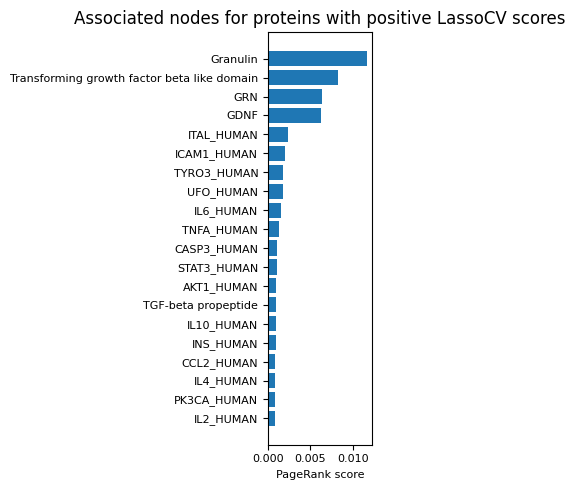

In [66]:
fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in high_prots_top_nodes[:20][::-1]], [x['score'] for x in high_prots_top_nodes[:20][::-1]], )
plt.title('Associated nodes for proteins with positive LassoCV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

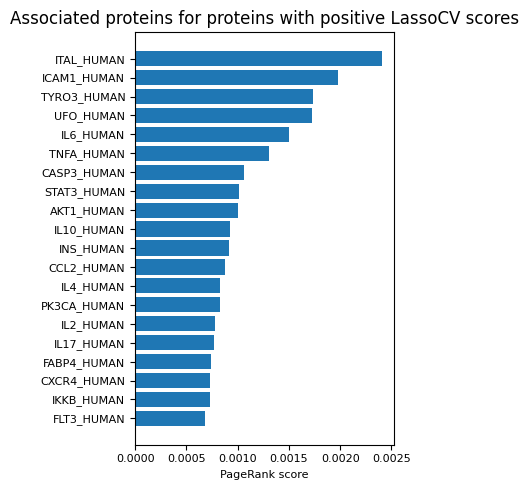

In [67]:
high_prots_top_proteins = [x for x in high_prots_top_nodes if x['category'] == 'Protein']

fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in high_prots_top_proteins[:20][::-1]], [x['score'] for x in high_prots_top_proteins[:20][::-1]], )
plt.title('Associated proteins for proteins with positive LassoCV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

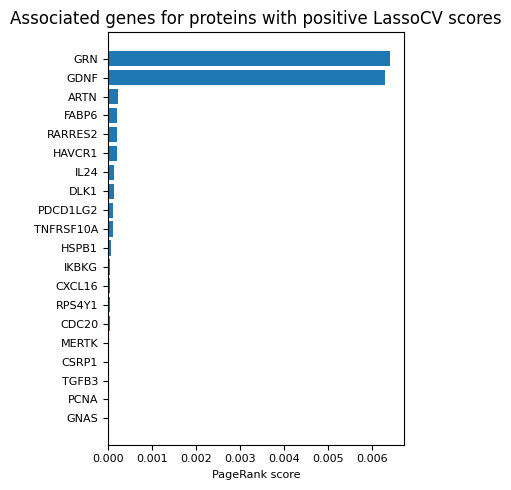

In [68]:
high_prots_top_genes = [x for x in high_prots_top_nodes if x['category'] == 'Gene']

fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in high_prots_top_genes[:20][::-1]], [x['score'] for x in high_prots_top_genes[:20][::-1]], )
plt.title('Associated genes for proteins with positive LassoCV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

### Proteins with negative Lasso_CV scores

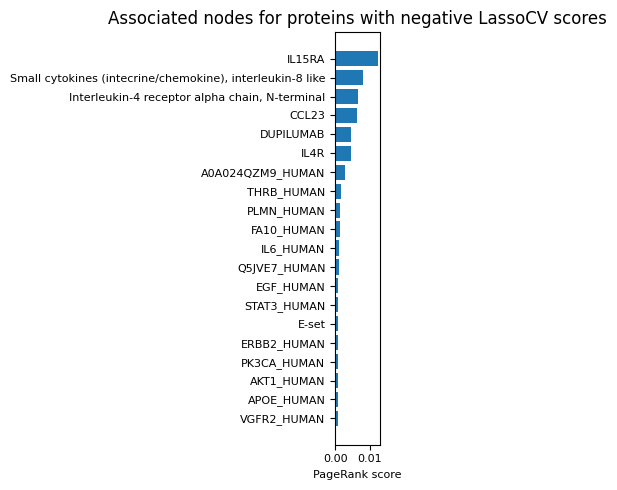

In [69]:
fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in low_prots_top_nodes[:20][::-1]], [x['score'] for x in low_prots_top_nodes[:20][::-1]], )
plt.title('Associated nodes for proteins with negative LassoCV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

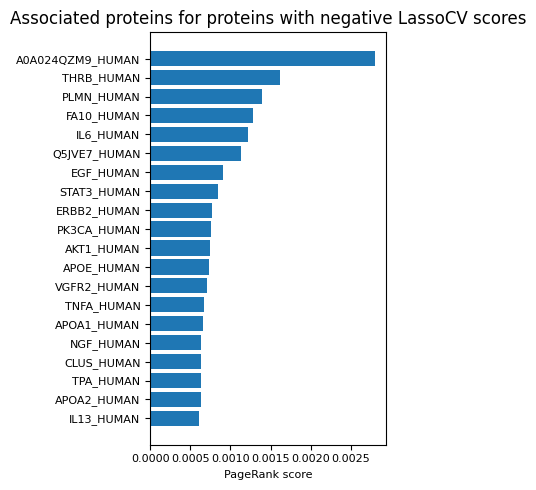

In [70]:
low_prots_top_proteins = [x for x in low_prots_top_nodes if x['category'] == 'Protein']

fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in low_prots_top_proteins[:20][::-1]], [x['score'] for x in low_prots_top_proteins[:20][::-1]], )
plt.title('Associated proteins for proteins with negative LassoCV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

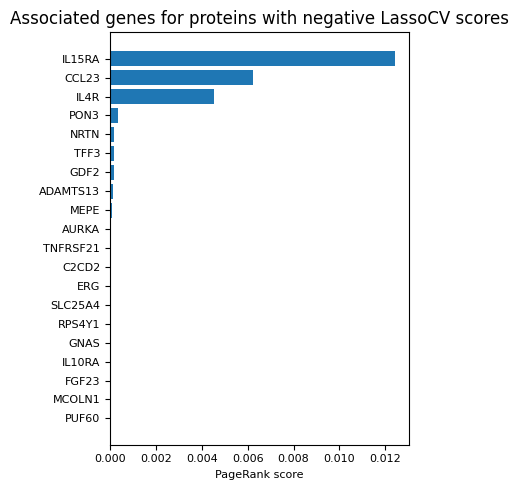

In [71]:
low_prots_top_genes = [x for x in low_prots_top_nodes if x['category'] == 'Gene']

fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in low_prots_top_genes[:20][::-1]], [x['score'] for x in low_prots_top_genes[:20][::-1]], )
plt.title('Associated genes for proteins with negative LassoCV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

## 5. Get Steiner trees / subgraphs

In [72]:
high_protein_st, high_protein_subgraph = kgfe.explanations.steiner_tree_subgraph(spoke_graph_ud,
                                                                                 high_prots_spoke_ids,
                                                                                 method='takahashi')

In [73]:
low_protein_st, low_protein_subgraph = kgfe.explanations.steiner_tree_subgraph(spoke_graph_ud,
                                                                              low_prots_spoke_ids,
                                                                              method='takahashi')

In [74]:
# TODO: get a connected component from the first chem?

## Visualizing subgraphs

In [77]:
import ipycytoscape

In [78]:
# TODO: display the node category somewhere, and display the edge categories
graph_style = [{
                        'selector': 'node[feature_name]',
                             'style': {
                                  'font-family': 'helvetica',
                                  'font-size': '20px',
                                 'label': 'data(feature_name)',
                        }},
                        {'selector': 'node[category="Protein"]',
                         'style': {
                             'background-color': 'blue',
                         }},
                        {'selector': 'node[in_query=1]',
                         'style': {
                             'border-width': '5px',
                             'border-color': 'red',
                         }},
                        {'selector': 'edge[type]',
                         'style': {
                             'label': 'data(type)',
                         }},
                        {"selector": "edge.directed",
                         "style": {
                            "curve-style": "bezier",
                            "target-arrow-shape": "triangle",
                    }},

                    ]

In [79]:
undirected = ipycytoscape.CytoscapeWidget()
high_protein_subgraph_nx = high_protein_subgraph.to_networkx()
node_dict = {i: n['name'] for i, n in high_protein_subgraph_nx.nodes.items()}
high_protein_subgraph_nx = nx.relabel_nodes(high_protein_subgraph_nx, node_dict)
undirected.graph.add_graph_from_networkx(high_protein_subgraph_nx)
undirected.set_tooltip_source('feature_name')
undirected.set_layout(title='high_proteins', nodeSpacing=80, edgeLengthVal=50, )
undirected.set_style(graph_style)

In [80]:
display(undirected)

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'title': 'high_proteins', 'nodeSpacing': 80, 'edgeLengthVal'…

In [81]:
low_prots_graph = ipycytoscape.CytoscapeWidget()
low_protein_subgraph_nx = low_protein_subgraph.to_networkx()
node_dict = {i: n['name'] for i, n in low_protein_subgraph_nx.nodes.items()}
low_protein_subgraph_nx = nx.relabel_nodes(low_protein_subgraph_nx, node_dict)
low_prots_graph.graph.add_graph_from_networkx(low_protein_subgraph_nx)
low_prots_graph.set_tooltip_source('name')
low_prots_graph.set_layout(nodeSpacing=80, edgeLengthVal=50)
low_prots_graph.set_style(graph_style)

In [82]:
display(low_prots_graph)

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'nodeSpacing': 80, 'edgeLengthVal': 50}, cytoscape_style=[{'…